## Gaussian Mixture Model Clustering

### Aim
To cluster the data points using GMM Algorithm

### DataSet
Seed Dataset

### Source
UCI Repository

In [ ]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Seed_Data.csv")
data=data.drop("target",axis=1)

In [ ]:
gmm=GaussianMixture(n_components=2,covariance_type='tied')
gmm.fit(data)
gmm.predict(data)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X=np.array(data)
y=gmm.predict(data)
z=gmm.score(data)
print("The log likelihood of the Gaussian model with 2 components is",round(z,2))

The log likelihood of the Gaussian model with 2 components is 3.74


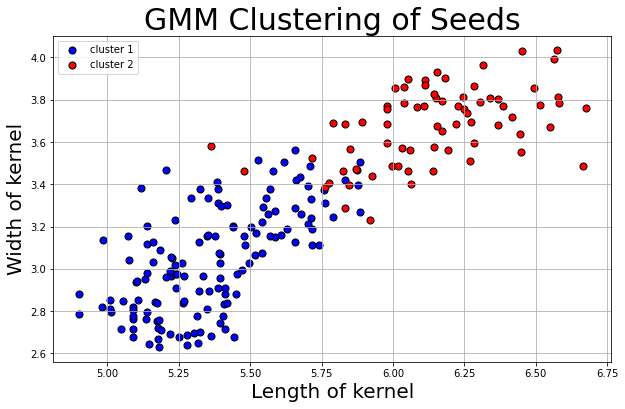

In [ ]:
# plot the 2 clusters
plt.figure(figsize=(10,6))
plt.scatter(
    X[y == 0, 3], X[y == 0, 4],
    c='blue',s=50,
    marker='o', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    X[y == 1, 3], X[y == 1, 4],
    c='red',s=50,
    marker='o', edgecolor='black',
    label='cluster 2'
)


plt.title("GMM Clustering of Seeds",fontsize=30)
plt.legend(scatterpoints=1)
plt.xlabel("Length of kernel",fontsize=20)
plt.ylabel("Width of kernel",fontsize=20)
plt.grid()
plt.show()

In [ ]:
# To find the optimal number of clusters for GMM we use silhoutte score method

In [ ]:
s=[]
r=range(2,11)
for k in r:
  model=GaussianMixture(n_components=k,n_init=20, init_params='kmeans')
  labels=model.fit_predict(X)
  s.append(metrics.silhouette_score(X, labels, metric='euclidean'))

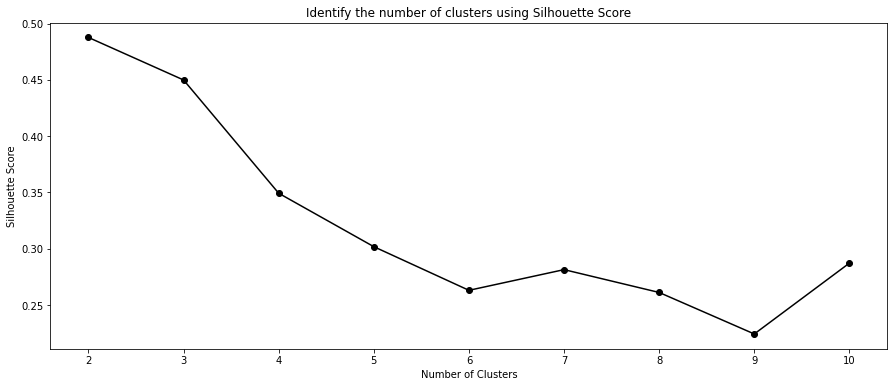

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(r, s, 'bo-', color='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [ ]:
# We observe that using silhoutte score we are getting optimal clusters as 2
# Therefore our original model with 2 clusters is optimum.